In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import networkx.algorithms.bipartite as bp

In [2]:
# loading crime data
data_crime = "https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/out.moreno_crime_crime"
crime = pd.read_csv(data_crime, delim_whitespace=True, header=None, skiprows=[0,1], names=['Person', 'Crime'])
# loading relationship data
data_rel = "https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/rel.moreno_crime_crime.person.role"
crime['Relationship'] = pd.read_csv(data_rel, header=None)

crime.head()

,Person,Crime,Relationship
0,1,1,Suspect
1,1,2,Victim
2,1,3,Victim
3,1,4,Suspect
4,2,5,Victim


In [3]:
# Total number of people
len(crime.Person.unique())

829

In [4]:
# Total number of crimes
len(crime.Crime.unique())

551

In [5]:
# Count of how many crimes each person was involved in 
crime.Person.value_counts().head()

815    25
2      22
425    18
220    17
56     14
Name: Person, dtype: int64

In [6]:
# adding count 
crime['Count'] = crime.groupby(['Person'])['Crime'].transform('count')
crime.head()

,Person,Crime,Relationship,Count
0,1,1,Suspect,4
1,1,2,Victim,4
2,1,3,Victim,4
3,1,4,Suspect,4
4,2,5,Victim,22


In [10]:
## segregating attributes here to get a relationship count and a total crime count 
crime2 = crime
crime2['rel_count'] = crime2.groupby(['Person', 'Relationship'])['Crime'].transform('count')
crime2['crime_count'] = crime2.groupby(['Person'])['Crime'].transform('count')
del crime2['Count']
crime2.head()

,Person,Crime,Relationship,rel_count,crime_count
0,1,1,Suspect,2,4
1,1,2,Victim,2,4
2,1,3,Victim,2,4
3,1,4,Suspect,2,4
4,2,5,Victim,4,22


In [152]:
# loading name data
data_names = 'https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/ent.moreno_crime_crime.person.name'
names = pd.read_csv(data_names, sep='\t', header=None)

# loading sex data
data_sex = 'https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/ent.moreno_crime_crime.person.sex'
names['Sex'] = pd.read_csv(data_sex, header=None)
names.ix[names.Sex == 1, 'Sex'] = 'M'
names.ix[names.Sex == 0, 'Sex'] = 'F'

# replacing left nodes (people involved in a crime) with names and adding sex
# Right nodes stay as numbers to identify as crimes, not people
for i in range(0,len(names)):
    crime2.ix[crime2.Person == i+1, 'Sex'] = names.iloc[i][1]
    crime2.ix[crime2.Person == i+1, 'Person'] = names.iloc[i][0]
    
crime.head()

,Person,Crime,Relationship,rel_count,crime_count,Sex
0,AbelDennis,1,Suspect,2,4,M
1,AbelDennis,2,Victim,2,4,M
2,AbelDennis,3,Victim,2,4,M
3,AbelDennis,4,Suspect,2,4,M
4,AbramsChad,5,Victim,4,22,M


In [203]:
## reloading data in bipartite fashion
G2 = nx.Graph()
#G2.add_nodes_from(list(crime['Person']), bipartite=0)
#G2.add_nodes_from(list(crime['Crime']), bipartite=1)

## Loading nodes, edges separately to get a bipartite structure, with node attributes and top/bottom nodes

In [204]:
# add person nodes
for i in range(len(crime2)): 
    G2.add_node(crime2.iloc[i][0],
                Relation=crime2.iloc[i][2],
                rel_count=crime2.iloc[i][3],
                weight=crime2.iloc[i][4],
                Sex=crime2.iloc[i][5],
                bipartite=1)



In [205]:
# add crime nodes
for i in range(len(crime2)): 
    G2.add_node(crime2.iloc[i][1],
                bipartite=0)


In [206]:
# add edges
# There's an edge between two stations if there was a trip between them.
# Edges are weighted by the number of trips
for i in range(len(crime2)):
    G2.add_edge(crime2.iloc[i][0], crime2.iloc[i][1], weight=1)

In [207]:
nx.is_connected(G2), nx.is_bipartite(G2)

(False, True)

In [208]:
top_nodes = set(n for n,d in G2.nodes(data=True) if d['bipartite']==1)
bottom_nodes = set(G2) - top_nodes

In [277]:
print ""
print "Persons"
print "------------------"
for i in range(len(top_nodes)):
    print '%s    ' % (list(top_nodes)[i])


Persons
------------------
ParkerByron    
SargentDaniel    
SmothersFreddie    
CottonJo    
BurnsDarian    
MadisonSonny    
KentonMelba    
BeckerMax    
HoltJuanita    
JamesSara    
DysonBert    
IvyRenata    
DwyerBart    
PetersAdrian    
NorthTess    
GodfreyJudy    
HarriganDustin    
SimpkinsBrenda    
GliddenMarcia    
ToomeyMartin    
StepneyGladys    
KenneyMarcus    
HayesElla    
BeckerToby    
ShawAmanda    
WhiteGeorge    
GilliganErin    
KillianGeorge    
O'MalleyConor    
HemphillBud    
PerryFrank    
MayCharlie    
ArmbrusterCassia    
MastersHelen    
SamuelLyle    
DinglePhilip    
ParkerSebastian    
Pinza Emilio    
PintaMimi    
LowellConrad    
LockePamela    
BurnsMoira    
ShipleyCarol    
BensonLouis    
CollinsRuben    
BlackDarriel    
PerkinsNathan    
DuncanOrrin    
MossSophie    
JeffersonTara    
ConklinShelley    
SmithVictoria    
FindlayGary    
AlleynDylan    
VestIrma    
ManheimMiller    
ThomasEddie    
SlatteryMaurice    
MarksLynette    


In [210]:
print ""
print "Crimes"
print "------------------"
for i in range(len(bottom_nodes)):
    print '%s    ' % (list(bottom_nodes)[i])


Crimes
------------------
1    
2    
3    
4    
5    
6    
7    
8    
9    
10    
11    
12    
13    
14    
15    
16    
17    
18    
19    
20    
21    
22    
23    
24    
25    
26    
27    
28    
29    
30    
31    
32    
33    
34    
35    
36    
37    
38    
39    
40    
41    
42    
43    
44    
45    
46    
47    
48    
49    
50    
51    
52    
53    
54    
55    
56    
57    
58    
59    
60    
61    
62    
63    
64    
65    
66    
67    
68    
69    
70    
71    
72    
73    
74    
75    
76    
77    
78    
79    
80    
81    
82    
83    
84    
85    
86    
87    
88    
89    
90    
91    
92    
93    
94    
95    
96    
97    
98    
99    
100    
101    
102    
103    
104    
105    
106    
107    
108    
109    
110    
111    
112    
113    
114    
115    
116    
117    
118    
119    
120    
121    
122    
123    
124    
125    
126    
127    
128    
129    
130    
131    
132    
133    
134    
135    
1

In [211]:
# Create graph
# G = nx.Graph()
# G = nx.from_pandas_dataframe(crime, 'Person', 'Crime', ['Relationship', 'Count', 'Sex'])


# a bit of info about the graph
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 1380
Number of edges: 1476
Average degree:   2.1391


## Hairball plot -- red = Person, blue = crime; node_size weighted by G2.degree()

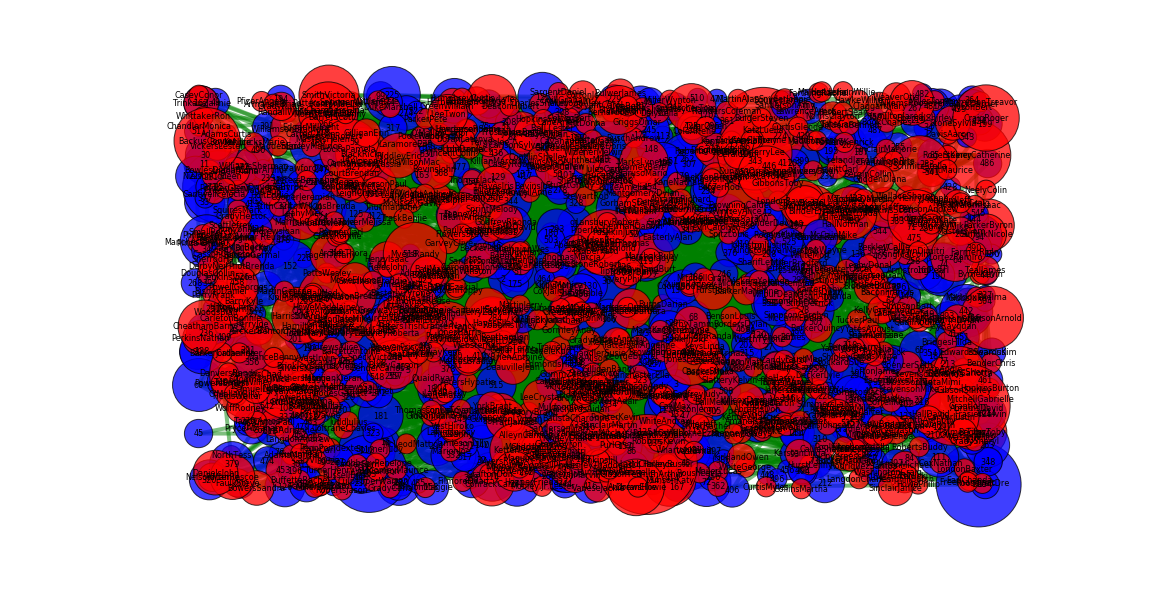

In [220]:
## plot the overall network
pos=nx.random_layout(G2) # positions for all nodes

## elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['Count'] > 10]
## esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['Count'] <= 10]

colors=[]
for n in G2.degree().keys():
    if n in G2.degree(top_nodes).keys():
        colors.append('r')
    else:
        colors.append('b')

# nodes
d = G2.degree()
nx.draw_networkx_nodes(G2,pos, node_color=colors, node_size=[v*400 for v in d.values()], alpha=0.75)

# edges
nx.draw_networkx_edges(G2,pos, width=4,alpha=0.5,edge_color='g',style='solid')
#nx.draw_networkx_edges(G2,pos,edgelist=esmall, width=2,alpha=0.2,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G2, pos, font_size=8, font_family='sans-serif')

plt.axis('off')
plt.show()

## These centrality measures are for the whole graph, so not sure how useful they are; we could try something like this with the bipartite graphs

In [221]:
## utility function to get topmost nodes for each centrality function
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x, items[:top])

# Betweenness centrality
bet_cen = nx.betweenness_centrality(G2)

# Degree centrality
deg_cen = nx.degree_centrality(G2)

# Closeness centrality
clo_cen = nx.closeness_centrality(G2)

# Eigenvector centrality
eig_cen = nx.eigenvector_centrality_numpy(G2)

## get the top nodes
top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cen = get_top_keys(eig_cen,10)
top_deg_cen = get_top_keys(deg_cen,10)

## smush them together to make a comparison chart
smush = np.hstack((top_bet_cen, top_clo_cen, top_eig_cen, top_deg_cen))

cent_measures=pd.DataFrame(smush, columns=['Node', 'Betweenness', 'Node', 'Closeness', 'Node', 'Eigenvector', 'Node', 'Degree'])

In [311]:
cent_measures

,Node,Betweenness,Node,Closeness,Node,Eigenvector,Node,Degree
0,WillisJenny,0.371301340152,47,0.10459398284,110,0.414920959003,WillisJenny,0.0181290790428
1,110,0.323802413821,SlatteryMaurice,0.10430116125,KatzLuella,0.414200419934,AbramsChad,0.0159535895577
2,SlatteryMaurice,0.254167041696,160,0.104197650534,SteinerCatherine,0.247706311047,110,0.0130529369108
3,23,0.252747859036,WillisJenny,0.104075584259,95,0.233381396842,KatzLuella,0.0130529369108
4,160,0.240850998043,23,0.10406620639,SmithMichaelThomas,0.220285657781,DicksonCarter,0.0123277737491
5,47,0.218627557343,AbramsChad,0.102962178704,417,0.183387969713,153,0.0108774474257
6,AbramsChad,0.189192601022,SteinerCatherine,0.102070416131,419,0.153482741794,BendixJerryLee,0.010152284264
7,46,0.178797977496,HemphillBud,0.101675038165,43,0.149970388001,14,0.00942712110225
8,14,0.168593116917,KarstenMae,0.101639246548,JohnstonJustin,0.142369334492,43,0.00942712110225
9,SteinerCatherine,0.156776034373,14,0.101416118592,MitchellGrant,0.138807303369,95,0.00942712110225


## not sure we need this next cell

In [223]:
# We have 20 subgraphs however one of them is a good size to work with.
subG = list(nx.connected_component_subgraphs(G2))
print 'Nodes    Edges'
print '--------------'
for g in subG:
    print '%4d     %4d' %(len(g.nodes()), len(g.edges()))

Nodes    Edges
--------------
1263     1377
  18       17
  13       12
   3        2
   2        1
  30       30
   6        5
   9        8
   2        1
   4        3
   5        4
   7        6
   2        1
   2        1
   3        2
   3        2
   2        1
   2        1
   2        1
   2        1


# Bipartite Projection Person

### x.x Island Analysis -- Persons

In [232]:
## Implementing the Island Method to look for important subgroups. ##
def trim_edges(g, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations = 5):
    # Iterates through the graph removing edges and returning the number of edges removed and
    #  the trimmed graph
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [230]:
cc = list(nx.connected_component_subgraphs(PC))[0]

In [297]:
## Running the Island Analysis on the graph. Will thow an error if the island_method is called with too many steps
islands = island_method(cc, iterations = 4)
print ''
print 'Depth  Persons  Networks'
print '-------------------------'
for island in islands:
    print(' %d       %2d       %2d' 
          %(island[0], len(island[1]), len(list(nx.connected_component_subgraphs(island[1]))))) 


Depth  Persons  Networks
-------------------------
 1       89       27
 2       28       12
 3       15        7
 4        6        3


## This gets us to 7 subnetworks, including one involving three people connected by the same crimes

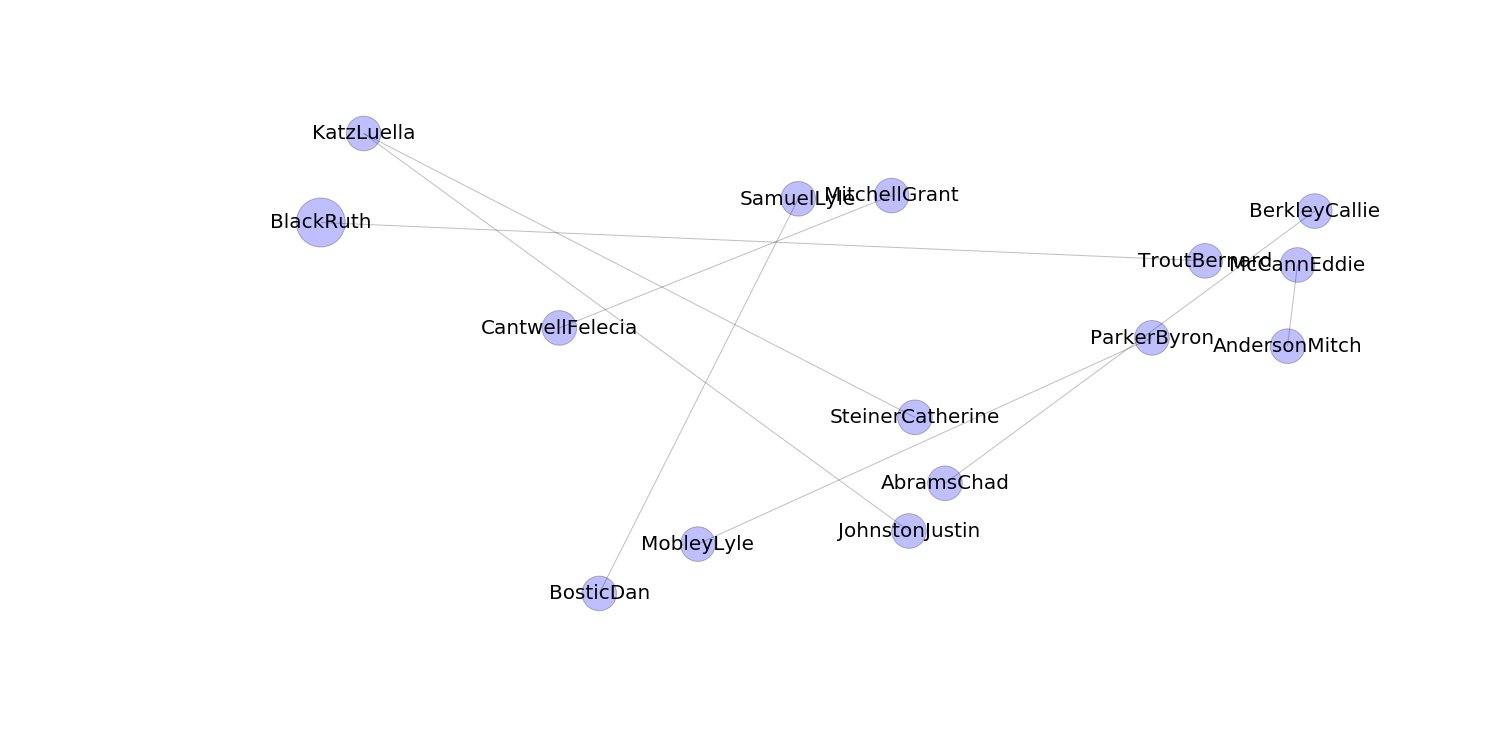

In [302]:
## Plotting created by the island analysis

pc = trim_edges(cc, 3)

dpc = pc.degree()
nx.draw_random(pc, node_size=[v*1200 for v in dpc.values()], with_labels=True, node_color='b', alpha=.25, font_size=20)

# Bipartite Projection, Crimes

In [303]:
# project bipartite graph onto crime nodes
# now the degrees are their connections with other crimes
# based on involvment by the same persons

CC = nx.bipartite.weighted_projected_graph(G2, bottom_nodes)

## x.x Island Analysis - Crimes

turns out to be interesting -- a six-node network involing the same victims/suspects. 


In [307]:
## Running the Island Analysis on the graph. Will thow an error if the island_method is called with too many steps
islands = island_method(CC, iterations = 2)
print ''
print 'Depth  Crime  Networks'
print '----------------------'
for island in islands:
    print(' %d      %3d      %2d' 
          %(island[0], len(island[1]), len(list(nx.connected_component_subgraphs(island[1])))))


Depth  Crime  Networks
----------------------
 1      119      36
 2       10       3


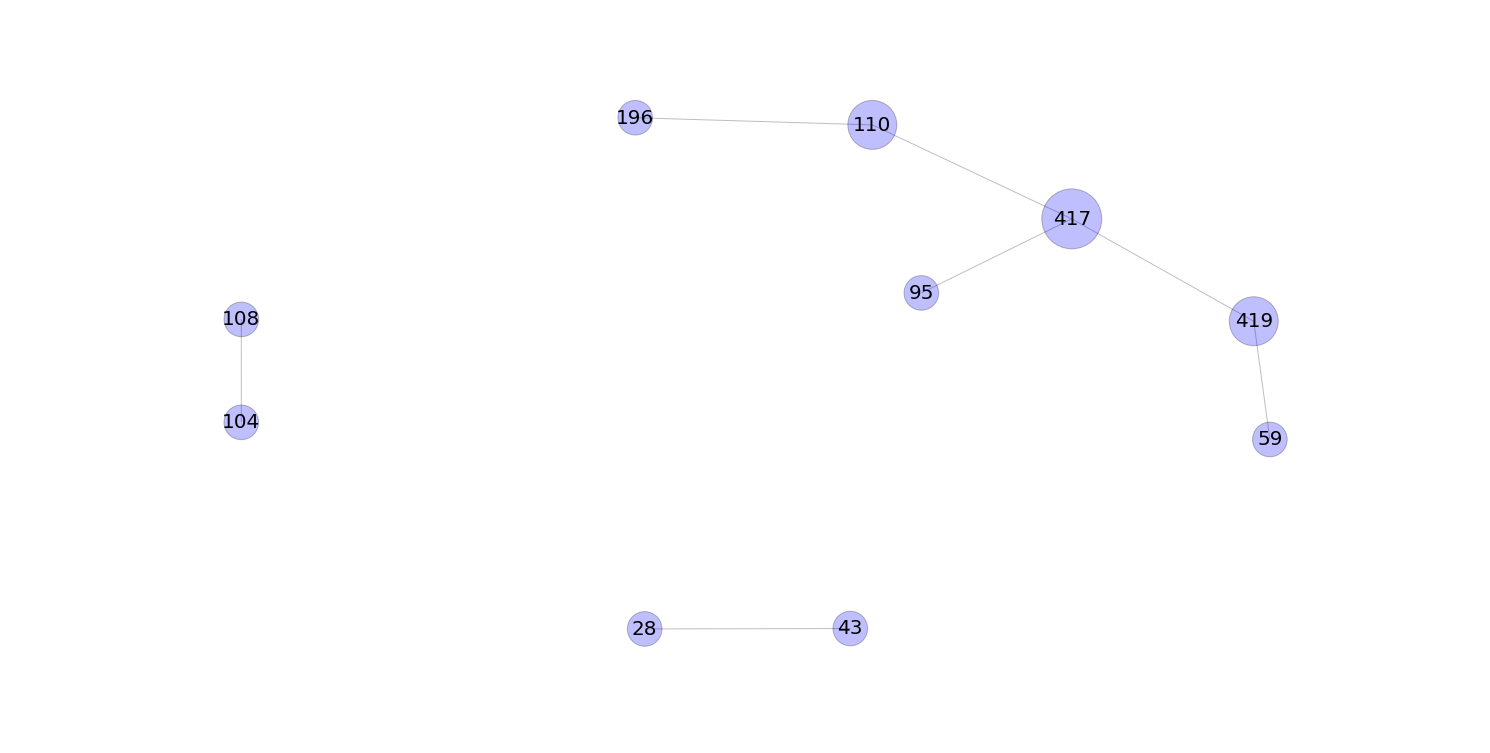

In [308]:
## Plotting the two graphs created by the island analysis

wc = trim_edges(CC, 2)
dwc = wc.degree()
nx.draw(wc, node_size=[v*1200 for v in dwc.values()], with_labels=True, node_color='b', alpha=.25, font_size=20)